# ggplot2 패키지 공부
### 출처 : http://www.di.fc.ul.pt/~jpn/r/
---

## 그림 사이즈 줄이고 싶다...

In [123]:
library(ggplot2)
library(gridExtra) # plots을 나란히 보여주기 위한 패키지
library(MASS)
library(hexbin)
library(IRdisplay)

In [40]:
set.seed(101)
d = diamonds[sample(nrow(diamonds), 100), ]
head(d)

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Very Good,F,VVS2,60.0,62,8553,6.43,6.46,3.87
0.90,Premium,J,VS1,62.3,56,3175,6.23,6.19,3.87
0.21,Premium,D,VS2,59.1,62,386,3.89,3.86,2.29
0.39,Ideal,G,VVS2,61.9,56,902,4.68,4.70,2.90
1.15,Ideal,I,VS2,61.7,57,5534,6.72,6.74,4.15
1.10,Premium,D,SI1,60.7,55,6468,6.74,6.71,4.08


# qplot
### qplot은 ggplot2의 plot 함수
---

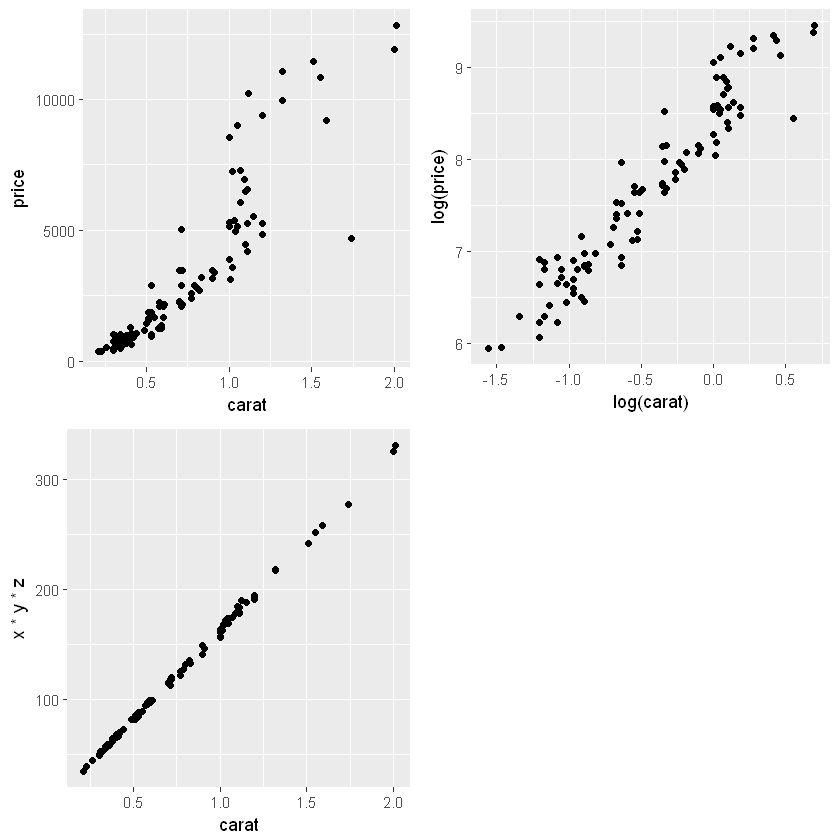

In [13]:
plot1 = qplot(carat,      price,      data = d)
plot2 = qplot(log(carat), log(price), data = d)
plot3 = qplot(carat,      x*y*z,      data = d)
gridExtra::grid.arrange(plot1, plot2, plot3, ncol = 2)

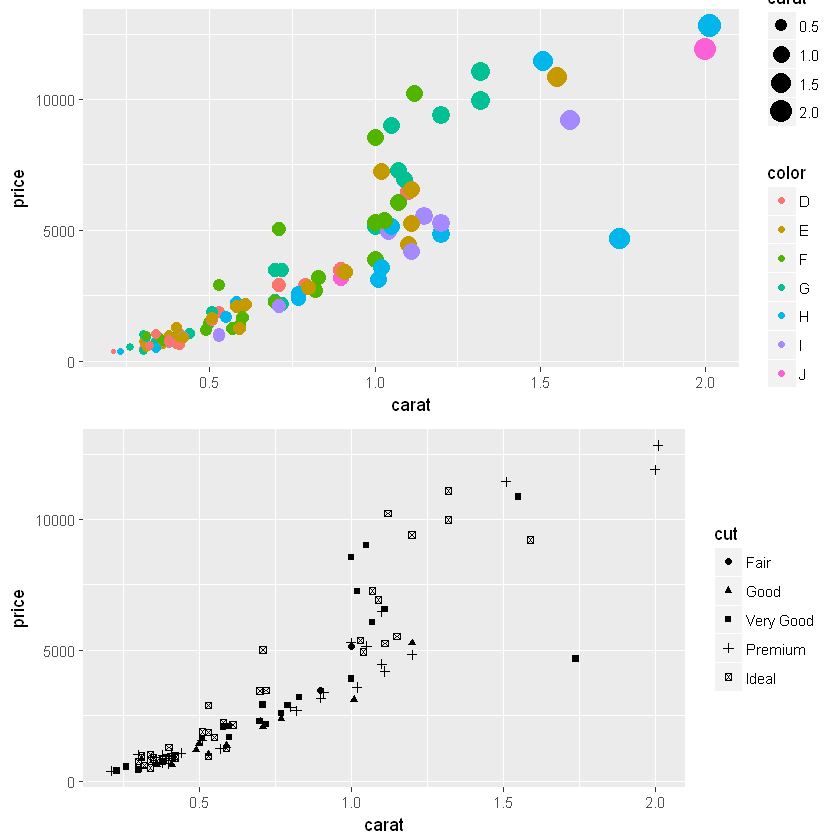

In [11]:
plot1 = qplot(crat, price, data = d, colour = color, size = carat)a
plot2 = qplot(carat, price, data = d, shape = cut)
grid.arrange(plot1, plot2, ncol = 1)

`geom_smooth()` using method = 'loess'
Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

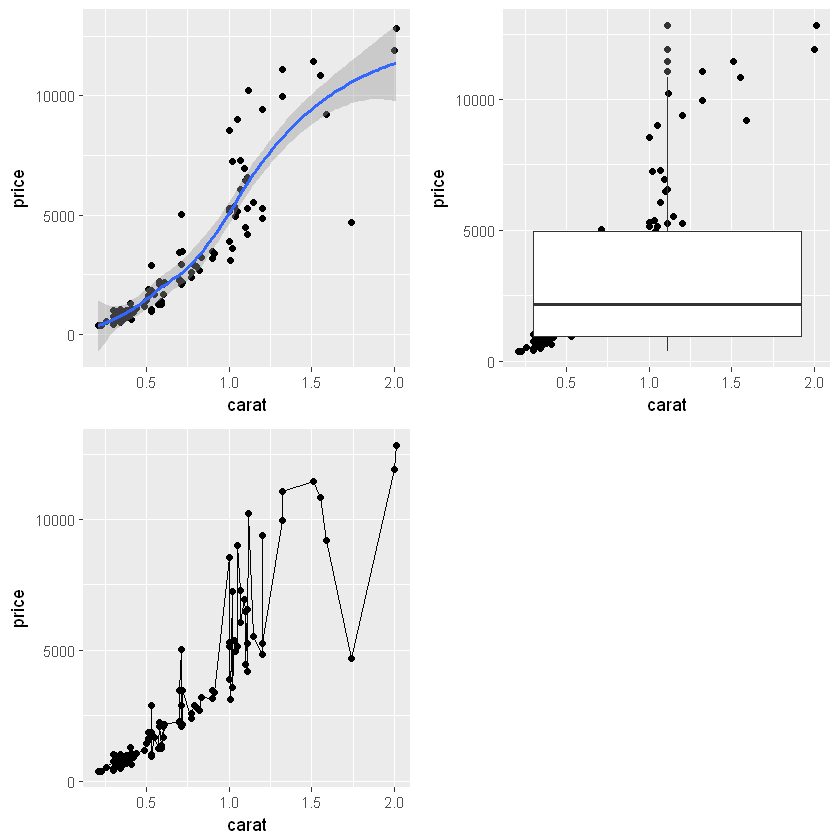

In [18]:
# plot1의 default smooth는 loess(locally weighted regression, 국소적) 회귀분석
plot1 = qplot(carat, price, data = d, geom = c("point", "smooth"))
plot2 = qplot(carat, price, data = d, geom = c("point", "boxplot"))
plot3 = qplot(carat, price, data = d, geom = c("point", "line"))
grid.arrange(plot1, plot2, plot3, ncol = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


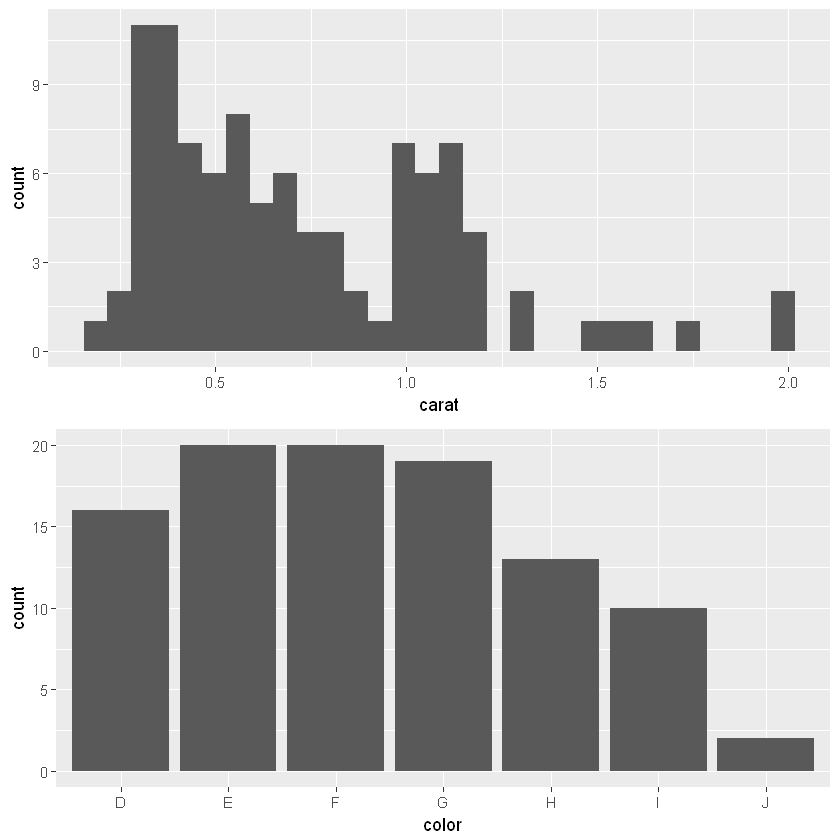

In [25]:
plot1 = qplot(carat, data = d, geom = "histogram")
plot2 = qplot(color, data = d, geom = "bar")
grid.arrange(plot1, plot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


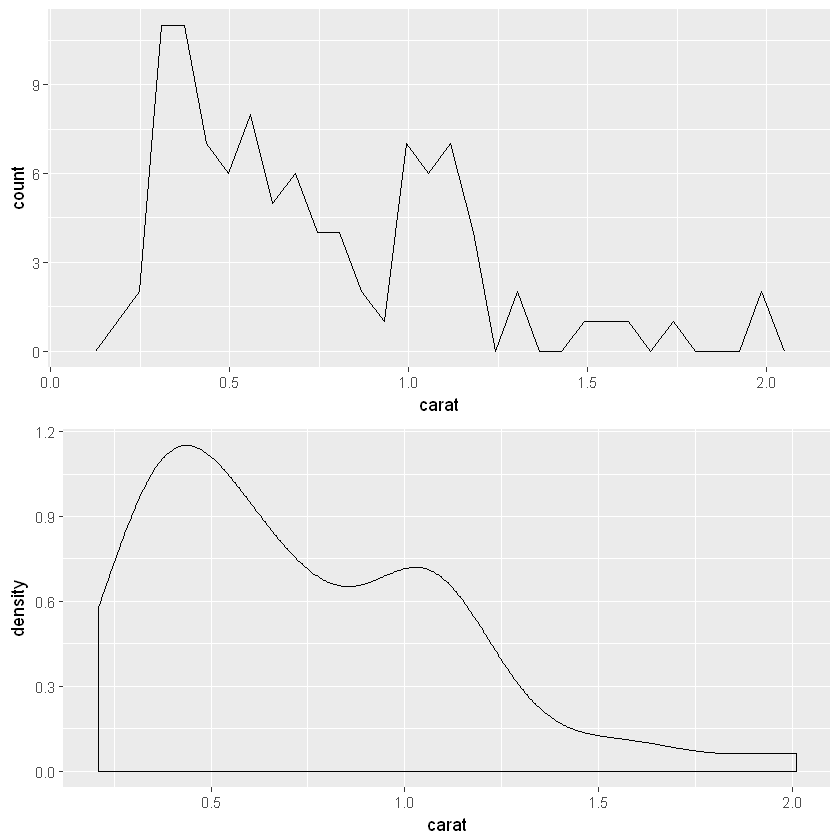

In [24]:
plot1 = qplot(carat, data = d, geom = "freqpoly")
plot2 = qplot(carat, data = d, geom = "density")
grid.arrange(plot1, plot2)

# Smooth geoms
### smooth geom은 여러 회귀분석 방법에 따라 그래프를 그릴 수 있게 해준다.

Warning message:
"Ignoring unknown parameters: method"Warning message:
"Ignoring unknown parameters: method, formula"

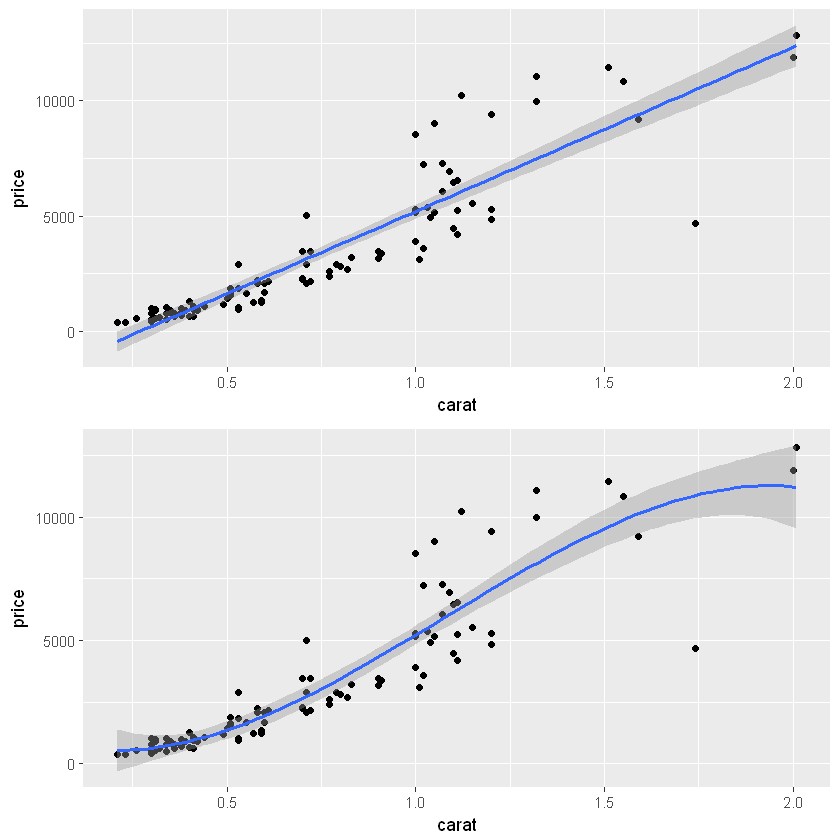

In [23]:
plot1 = qplot(carat, price, data = d, geom = c("point", "smooth"), method = "lm")
# plot2 = polynomial regression
plot2 = qplot(carat, price, data = d, geom = c("point", "smooth"), method = "lm", formula = y~poly(x,3))
grid.arrange(plot1, plot2)

Warning message:
"Ignoring unknown parameters: method, formula"Warning message:
"Ignoring unknown parameters: method"

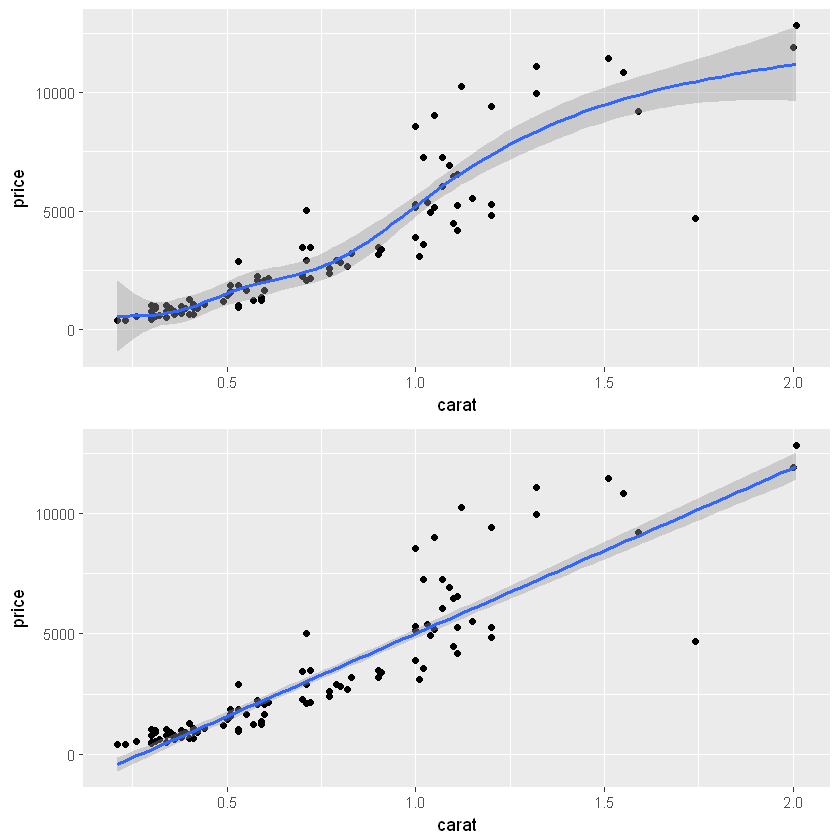

In [27]:
library(splines) # using natural splines
plot3 = qplot(carat, price, data = d, geom = c("point", "smooth"), method = "lm", formula = y~ns(x,5))
library(MASS) # for robust regression
plot4 = qplot(carat, price, data = d, geom = c("point", "smooth"), method = "rlm")
grid.arrange(plot3, plot4)

# Jitter and opacity
### 때때로 데이터가 많을 경우 바로 plot을 그리게 되면 데이터의 형태를 알아 볼 수 가 없다. 
### Jitter : 작은 무작위 노이즈를 추가하여 많은 동등한 데이터가 중심 주위로 퍼지도록 함
### Opacity : 불투명도의 정도를 정의. 

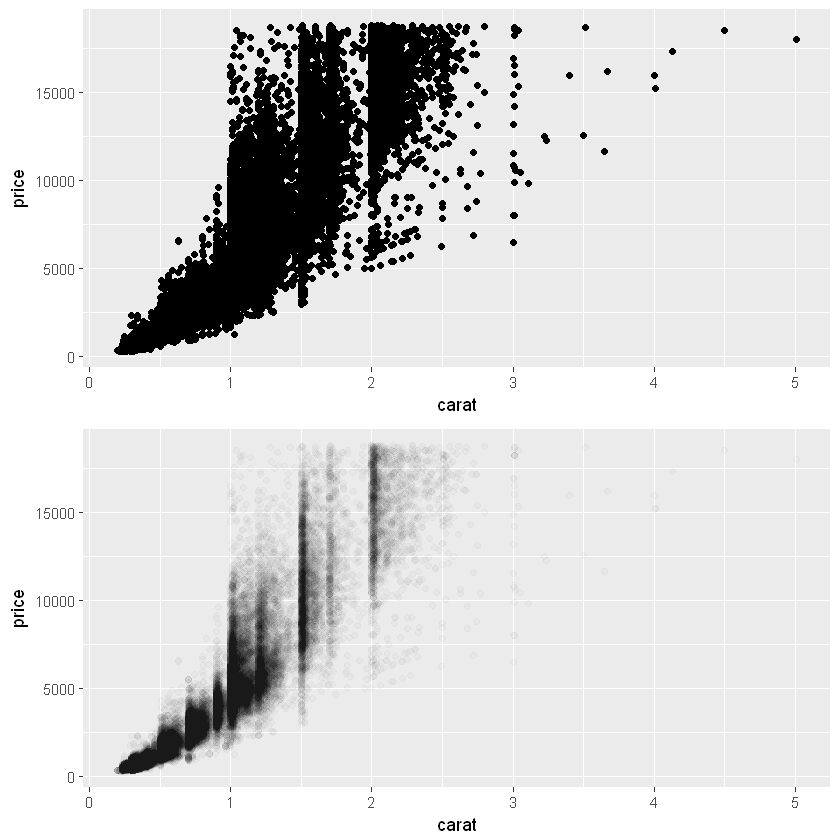

In [3]:
plot1 = qplot(carat, price, data = diamonds)
plot2 = qplot(carat, price, data = diamonds, alpha=I(1/50)) # opacity 지정
grid.arrange(plot1, plot2)

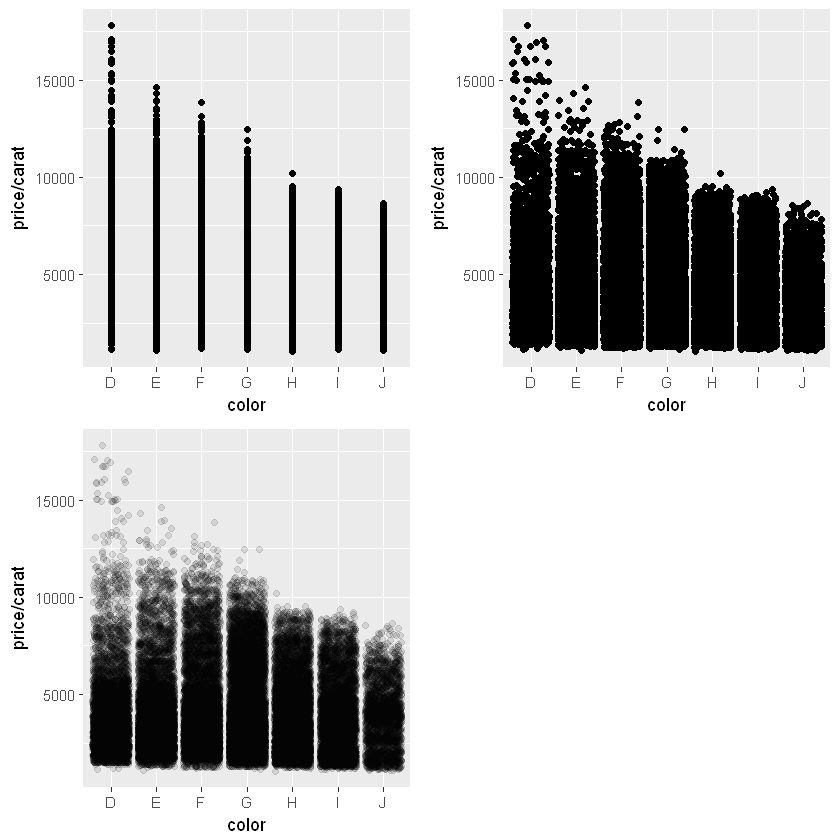

In [7]:
plot1 = qplot(color, price/carat, data = diamonds)
plot2 = qplot(color, price/carat, data = diamonds, geom = "jitter")
plot3 = qplot(color, price/carat, data = diamonds, geom = "jitter", alpha = I(1/10))
gridExtra::grid.arrange(plot1, plot2, plot3, ncol = 2)

# Histograms and density plots
---

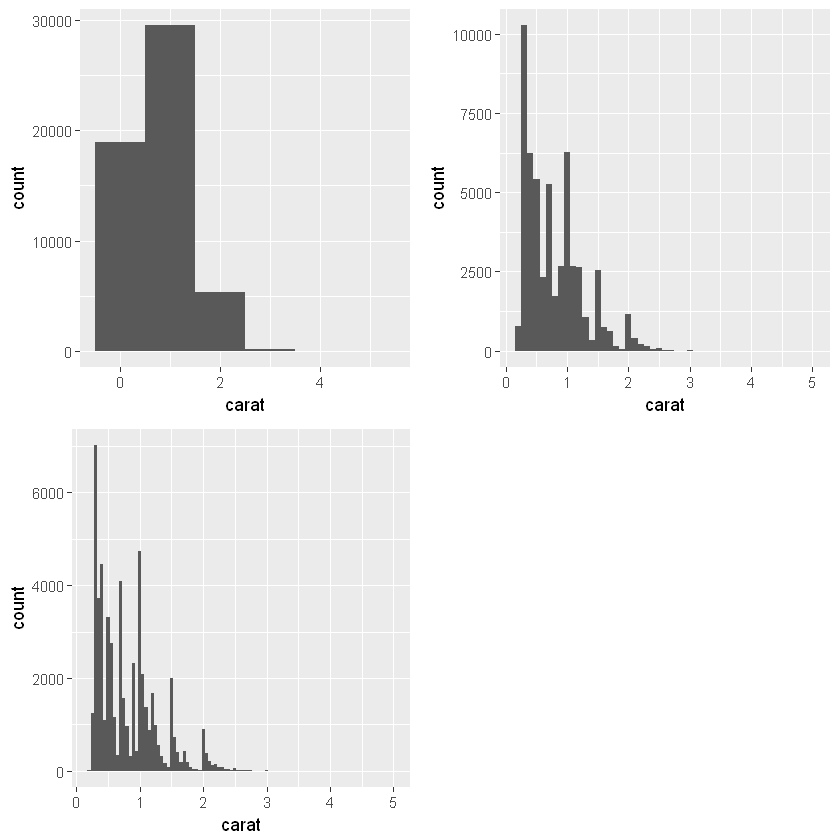

In [8]:
plot1 = qplot(carat, data = diamonds, geom = "histogram", binwidth = 1)
plot2 = qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.1)
plot3 = qplot(carat, data = diamonds, geom = "histogram", binwidth = 0.05)
gridExtra::grid.arrange(plot1, plot2, plot3, ncol = 2)

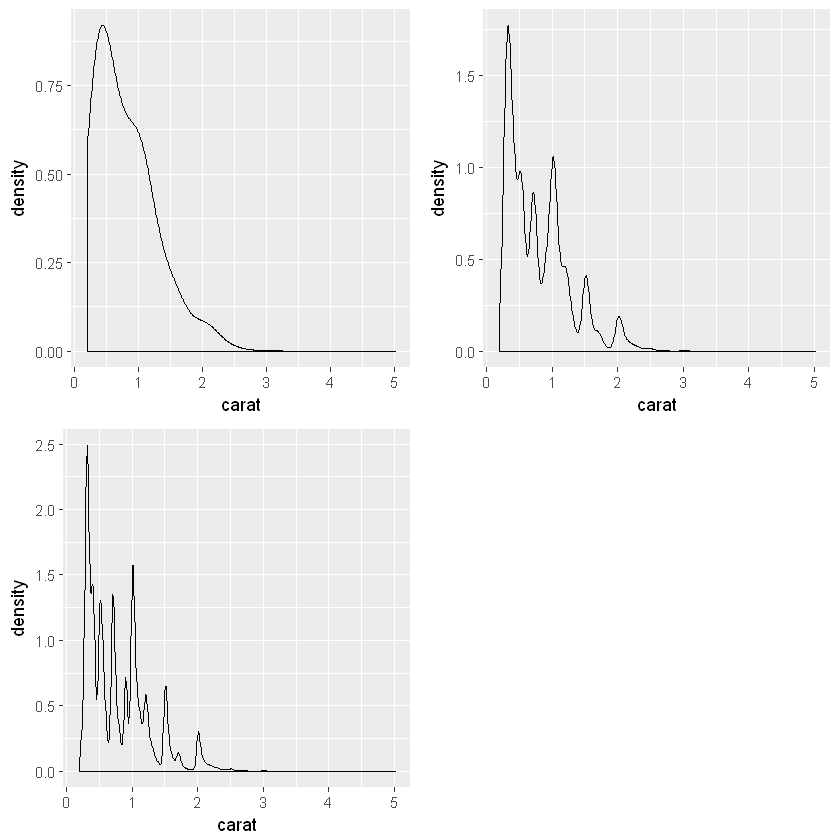

In [9]:
plot1 = qplot(carat, data = diamonds, geom = "density", adjust = 4)
plot2 = qplot(carat, data = diamonds, geom = "density", adjust = 1)
plot3 = qplot(carat, data = diamonds, geom = "density", adjust = 0.5)
grid.arrange(plot1, plot2, plot3, ncol=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


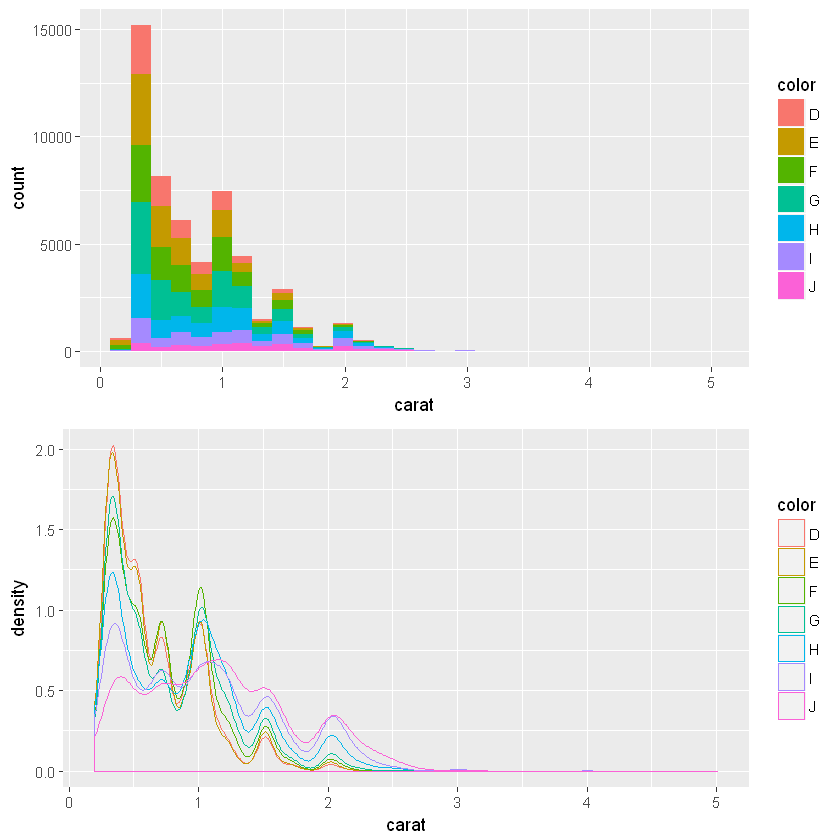

In [11]:
plot1 = qplot(carat, data = diamonds, geom = "histogram", fill = color)
plot2 = qplot(carat, data = diamonds, geom = "density", colour = color)
grid.arrange(plot1, plot2)

# Time series
### 시계열
---

In [13]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


In [15]:
year <- function(x){
    as.POSIXlt(x)$year + 1900
    # POSIXlt : 날짜 및 시간 클래스, 초 단위도 표현 가능
}
economics$year <- year(economics$date)
head(economics)

date,pce,pop,psavert,uempmed,unemploy,year
1967-07-01,507.4,198712,12.5,4.5,2944,1967
1967-08-01,510.5,198911,12.5,4.7,2945,1967
1967-09-01,516.3,199113,11.7,4.6,2958,1967
1967-10-01,512.9,199311,12.5,4.9,3143,1967
1967-11-01,518.1,199498,12.5,4.7,3066,1967
1967-12-01,525.8,199657,12.1,4.8,3018,1967


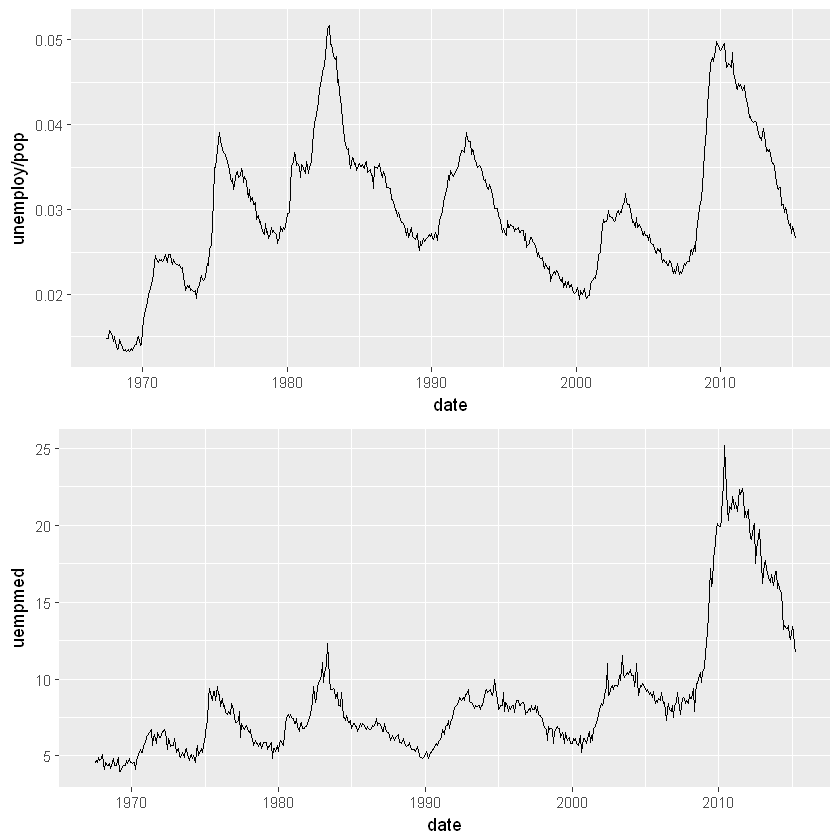

In [16]:
plot1 = qplot(date, unemploy/pop, data = economics, geom = "line")
plot2 = qplot(date, uempmed,      data = economics, geom = "line")
grid.arrange(plot1, plot2)

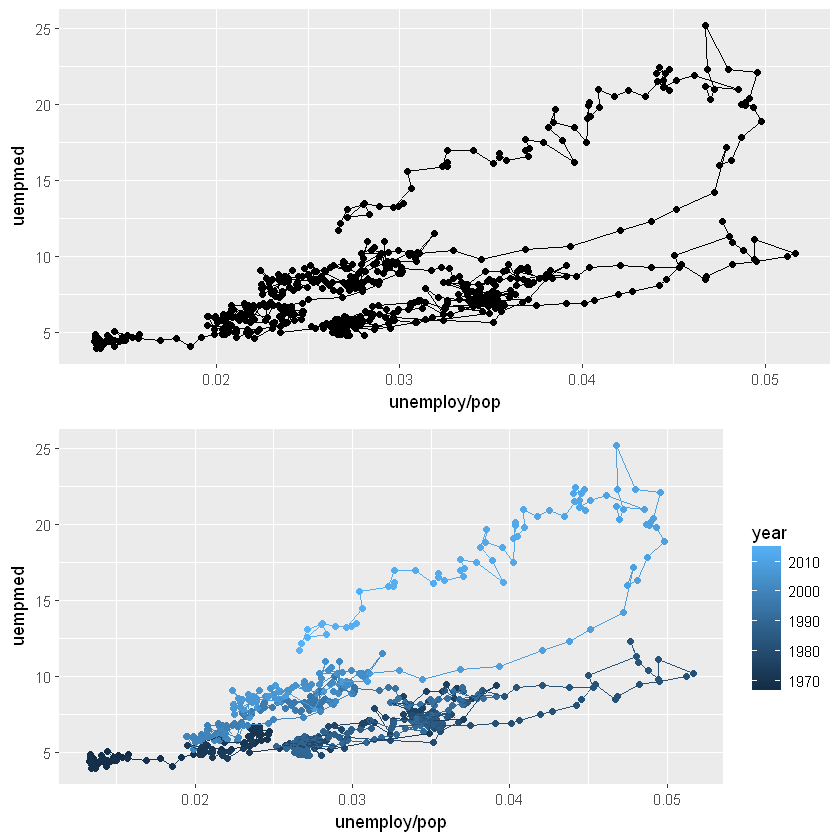

In [21]:
plot1 = qplot(unemploy/pop, uempmed, data = economics, geom = c("point", "path"))
plot2 = qplot(unemploy/pop, uempmed, data = economics, geom = c("point", "path"), color = year)
grid.arrange(plot1, plot2)

# Faceting
### 집단 구분 변수 의 수준별 로 별도 의 그래프 를 병치 시키는 방법
---

Warning message:
"Ignoring unknown parameters: binwidth"Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."

Warning message:
"Removed 32 rows containing non-finite values (stat_density)."

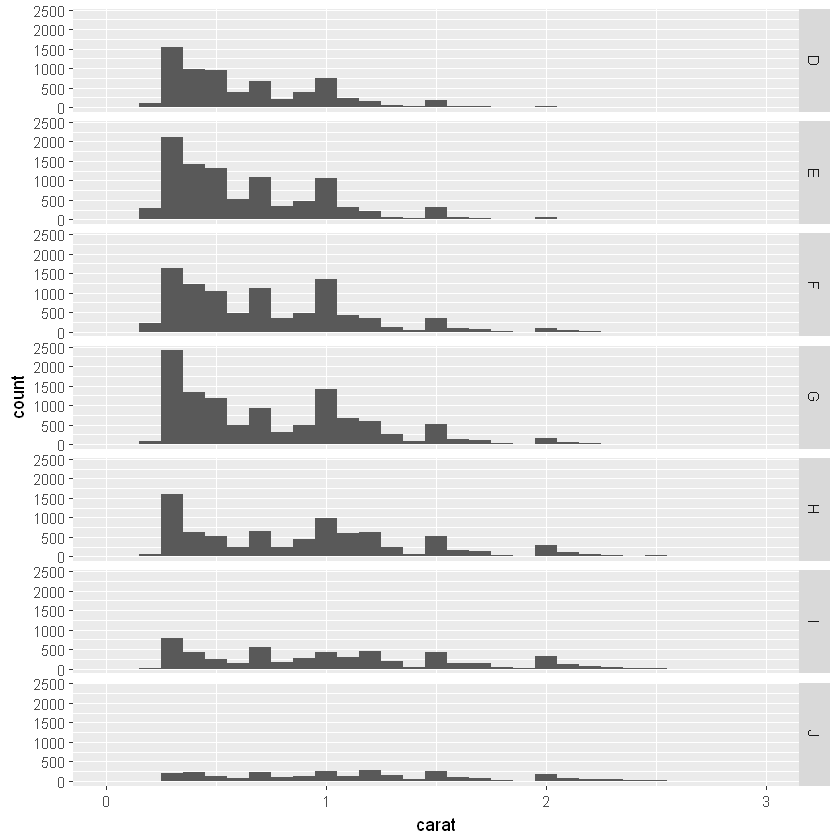

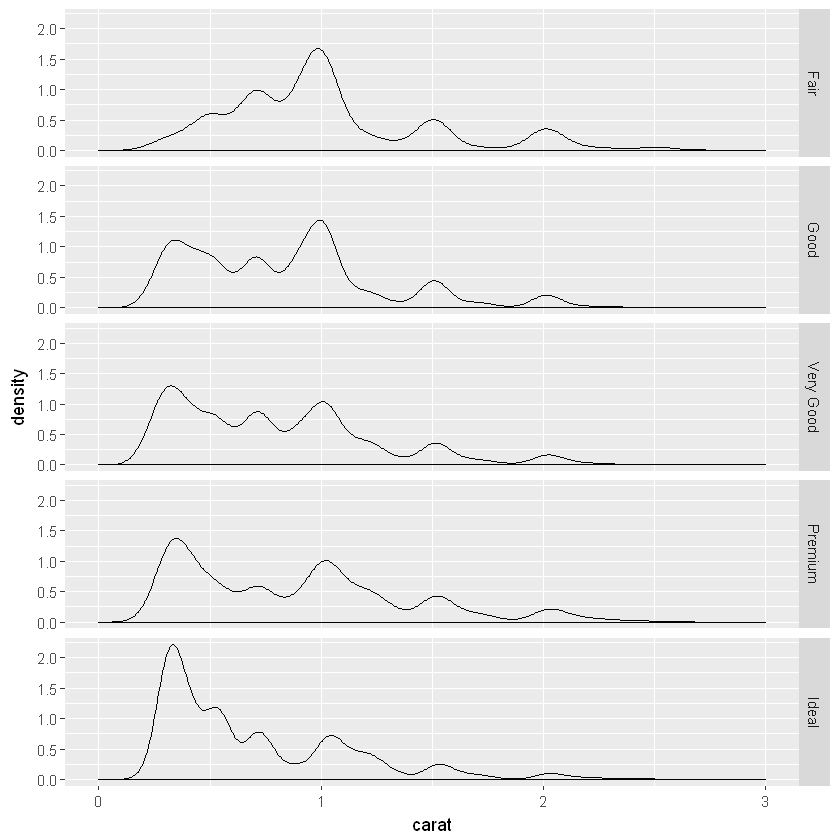

In [23]:
plot1 = qplot(carat, 
              data = diamonds, 
              facets = color ~ ., 
              geom = "histogram", 
              binwidth = 0.1, 
              xlim = c(0,3))
plot2 = qplot(carat, 
              data = diamonds,
              facets = cut ~ .,
              geom = "density", 
              binwidth = 0.05, 
              xlim = c(0,3))
plot1
plot2

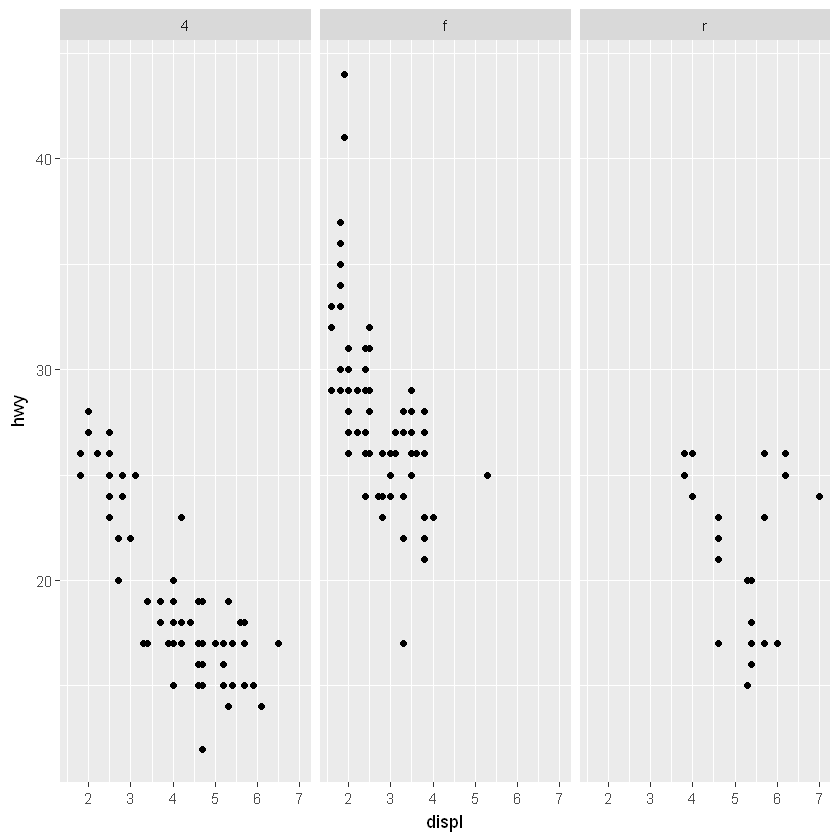

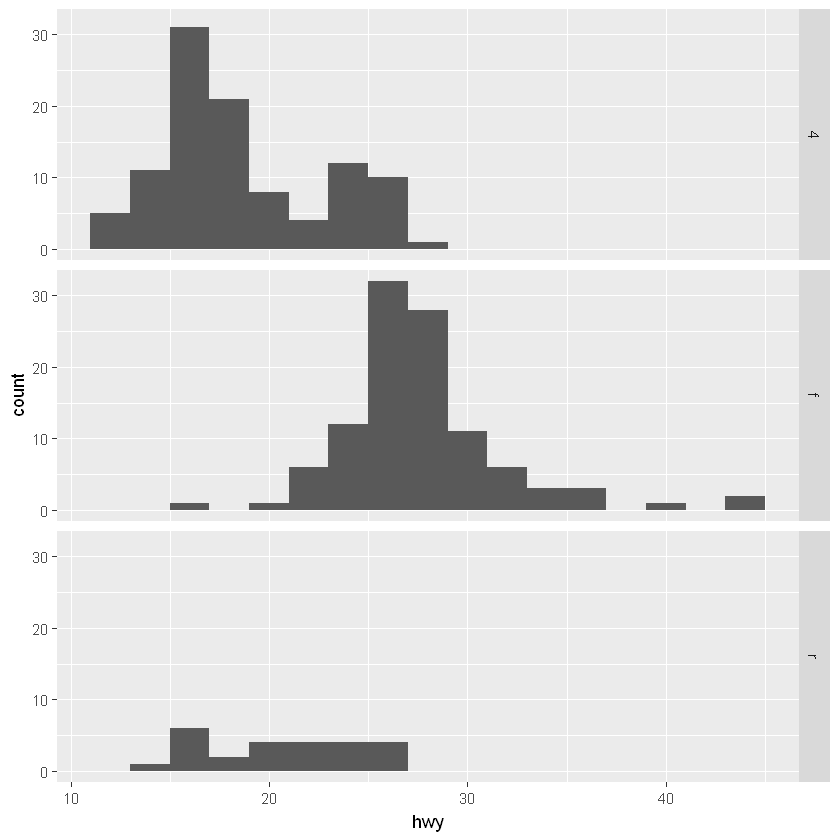

In [24]:
plot1 = qplot(displ, 
              hwy, 
              data = mpg, 
              facets = . ~ drv)
plot2 = qplot(hwy,
             data = mpg,
             facets = drv ~ .,
             binwidth = 2)
plot1
plot2

# Other options
---

Warning message:
"Removed 59 rows containing missing values (geom_point)."

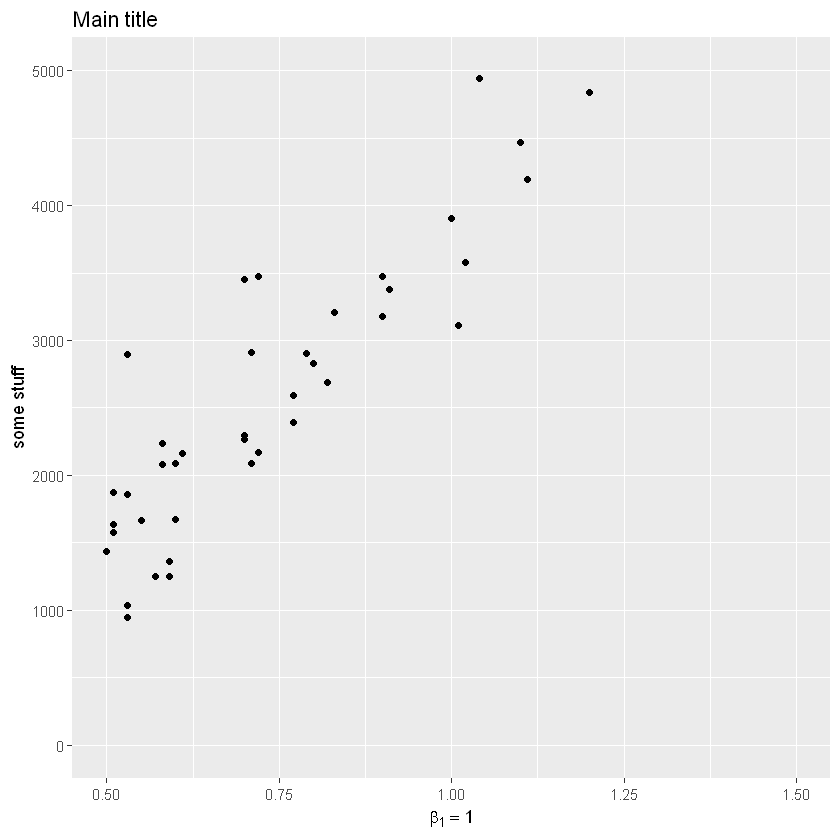

In [41]:
qplot(carat, price, data = d,
     xlim = c(0.5, 1.5),
     ylim = c(0, 5e3),
     main = "Main title",
     xlab = expression(beta[1] == 1),
     ylab = "some stuff")

ERROR: Error in ggplot(data, aesthetics, environment = env): 객체 'd'를 찾을 수 없습니다


# ggplot and Layer
### Layers는 우리가 plot에서 인식하는 객체를 생성한다.
### 4가지로 구성되어 있음
- 데이터와 미적요소
- 통계 변환
- 기하학적 객체
- 위치조정

### qplot도 모든 것들을 파라미터로 가지고 있다.
### 하지만 우리가 그래픽 생성을 더 잘 제어하기 위해서는, ggplot을 사용해야 한다.

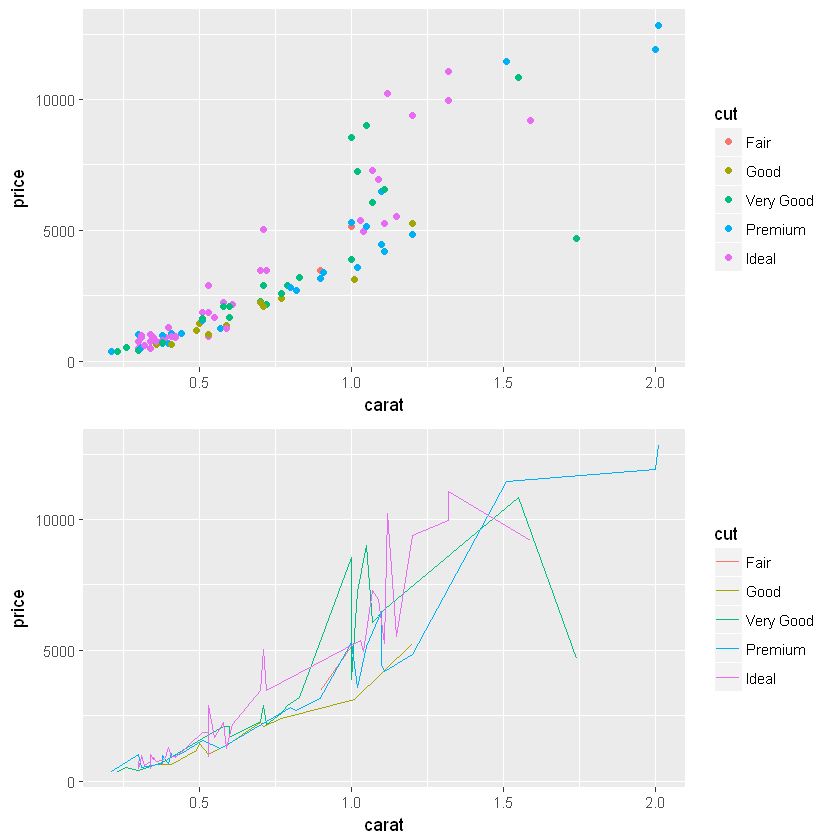

In [51]:
p = ggplot(d, 
           aes(carat,
               price, 
               colour = cut))
plot1 = p + geom_point()
plot2 = p + geom_line()
gridExtra::grid.arrange(plot1, plot2)

`geom_smooth()` using method = 'loess'
Warning message:
"Removed 22 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 22 rows containing missing values (geom_point)."

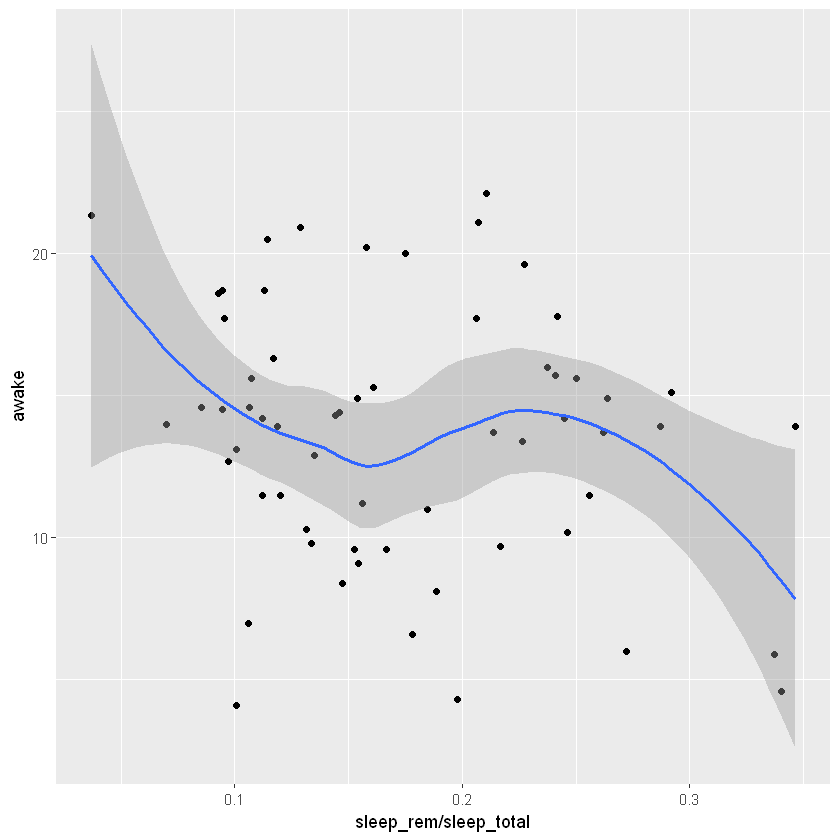

In [56]:
ggplot(msleep,
      aes(sleep_rem / sleep_total,
         awake)) + geom_point() + geom_smooth()

# Data
### %+% : 같은 그래프 객체에 다른 데이터를 사용할 수 있다.
---

In [57]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


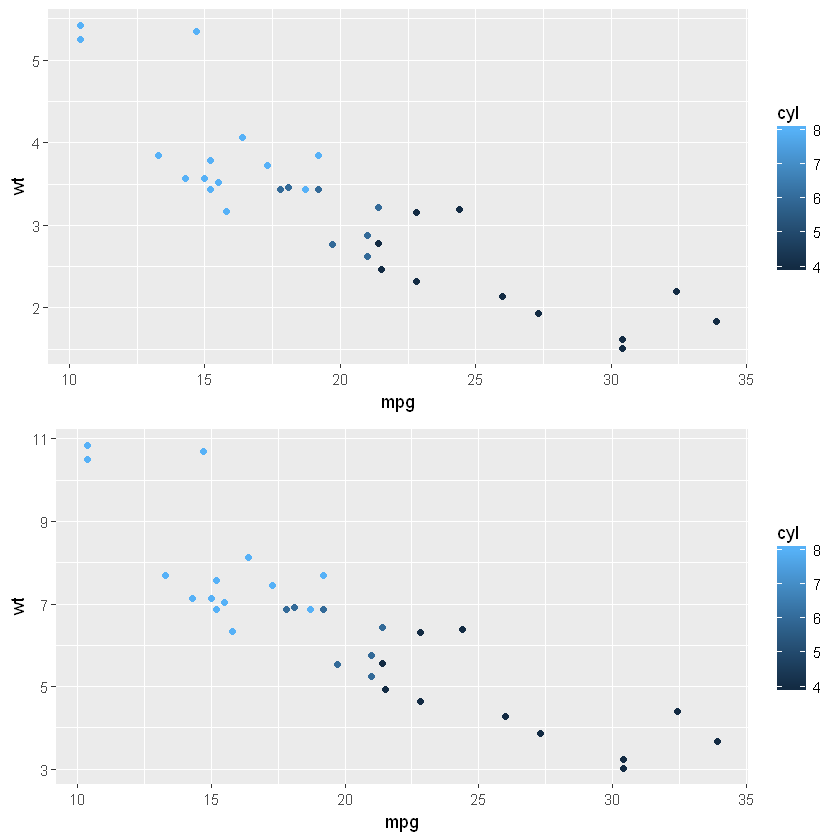

In [59]:
plot1 = ggplot(mtcars,
              aes(mpg,
                 wt,
                 colour = cyl)) + geom_point()
mtcars2 = transform(mtcars,
                   wt = wt*2)
plot2 = plot1 %+% mtcars2
grid.arrange(plot1, plot2)

# Aesthetics
### 미적 요소
### aes(x, y, 여러가지 arguments)

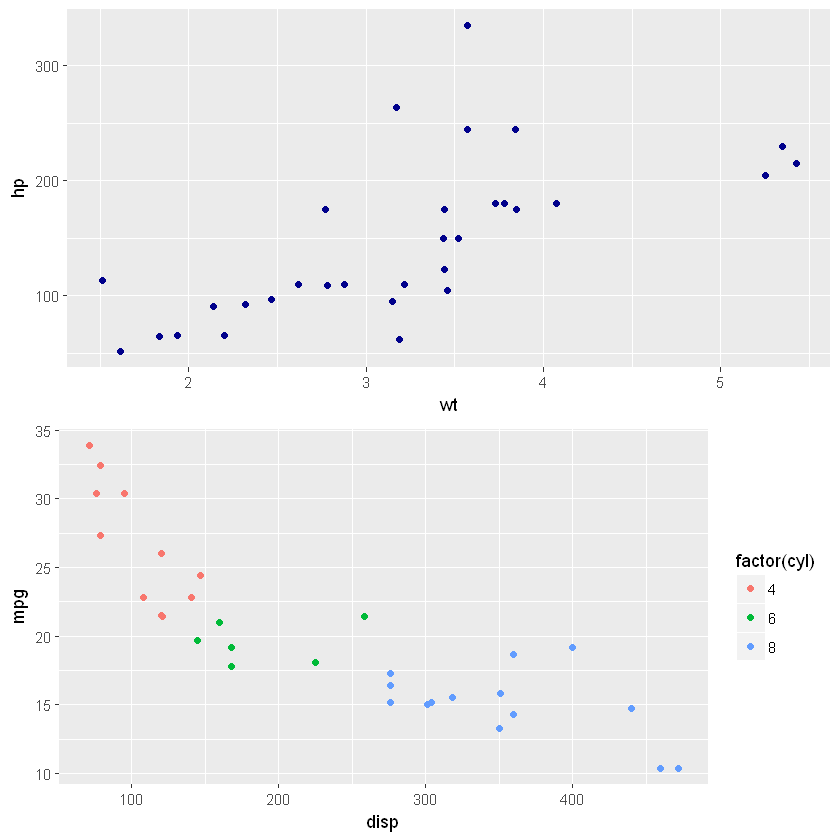

In [65]:
p = ggplot(mtcars)
plot1 = p + aes(wt, hp) + geom_point(colour = "darkblue") # set colors
plot2 = p + aes(disp, mpg) + geom_point() + aes(colour = factor(cyl)) # map color
gridExtra::grid.arrange(plot1, plot2)

# Grouping
---

Warning message:
"position_dodge requires non-overlapping x intervals"

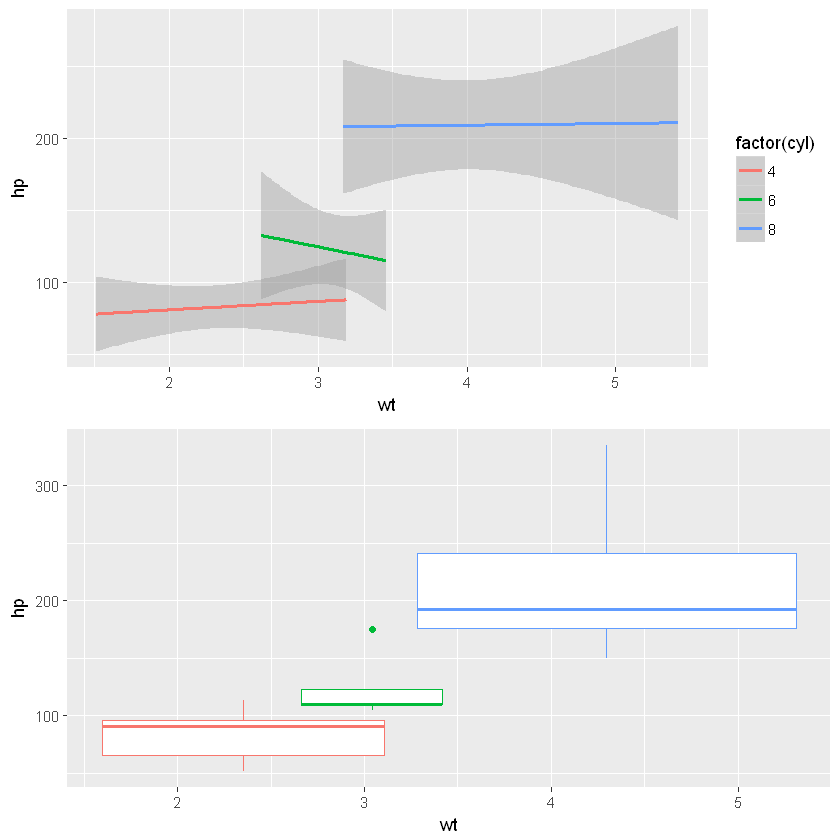

In [68]:
plot1 = ggplot(mtcars,
              aes(wt,
                 hp,
                 colour = factor(cyl),
                 group = cyl)) + geom_smooth(method = "lm")

plot2 = ggplot(mtcars,
              aes(wt,
                 hp, 
                 colour = factor(cyl),
                 group = cyl)) + geom_boxplot() + theme(legend.position = "none")
# legend.position = "none" : legend(범례) 제거
grid.arrange(plot1, plot2)

# Geoms
---

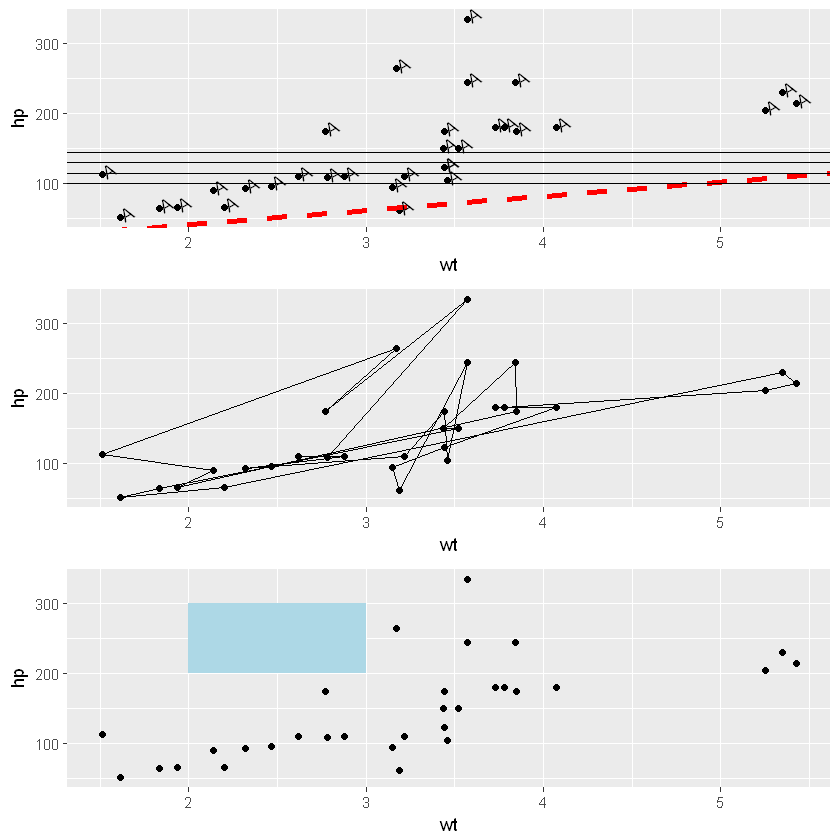

In [95]:
p = ggplot(mtcars) + aes(wt,
                        hp) + geom_point()
plot1 = p + geom_abline(intercept = 2,
                       slope = 20,
                       colour = "red",
                       size = 1.5,
                       linetype = "dashed") + 
            geom_hline(yintercept = seq(from = 100,
                                        to = 150,
                                        by = 15)) + 
            geom_text(label = "   A",
                      angle = 30)
plot2 = p + geom_path(size = 0.5,
                     lineend = "round")

plot3 = p + geom_rect(xmin = 2,
                     xmax = 3,
                     ymin = 200,
                     ymax = 300,
                     fill = "lightblue")
gridExtra::grid.arrange(plot1, plot2, plot3)

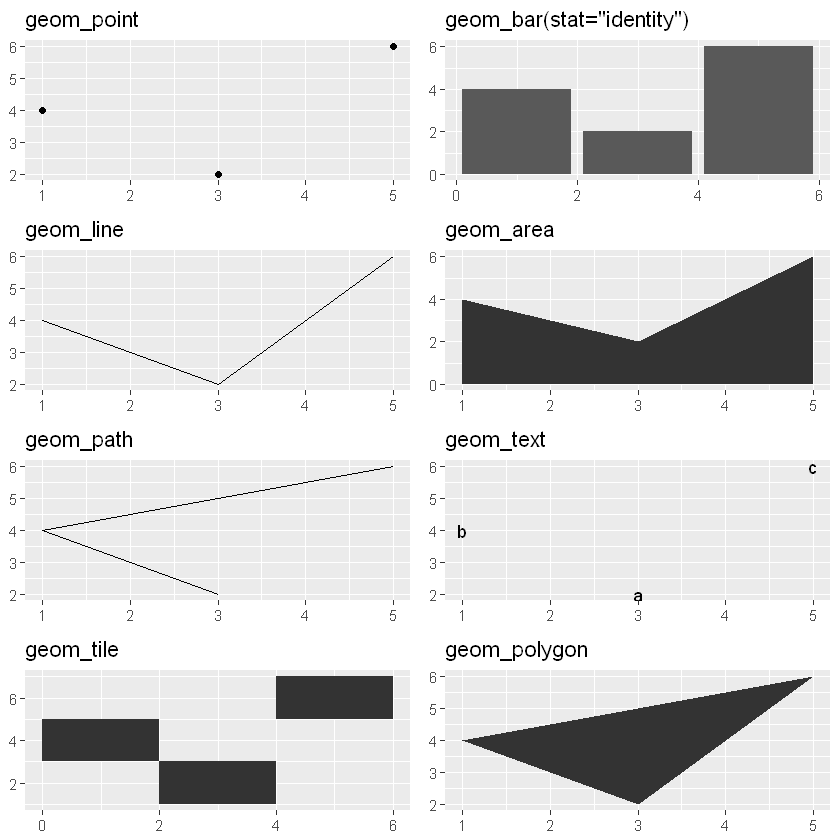

In [76]:
df <- data.frame(x = c(3, 1, 5),
                 y = c(2, 4, 6),
                 label = c("a","b","c"))
p <- ggplot(df, aes(x,
                    y,
                    label = label)) + xlab(NULL) + ylab(NULL)
plot1 <- p + geom_point() + ggtitle("geom_point")
plot2 <- p + geom_bar(stat="identity") + ggtitle("geom_bar(stat=\"identity\")")
plot3 <- p + geom_line() + ggtitle("geom_line")
plot4 <- p + geom_area() + ggtitle("geom_area")
plot5 <- p + geom_path() + ggtitle("geom_path")
plot6 <- p + geom_text() + ggtitle("geom_text")
plot7 <- p + geom_tile() + ggtitle("geom_tile")
plot8 <- p + geom_polygon() + ggtitle("geom_polygon")
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, nrow=4, ncol=2)

# Positions
### 각 요소들의 위치를 조정
---

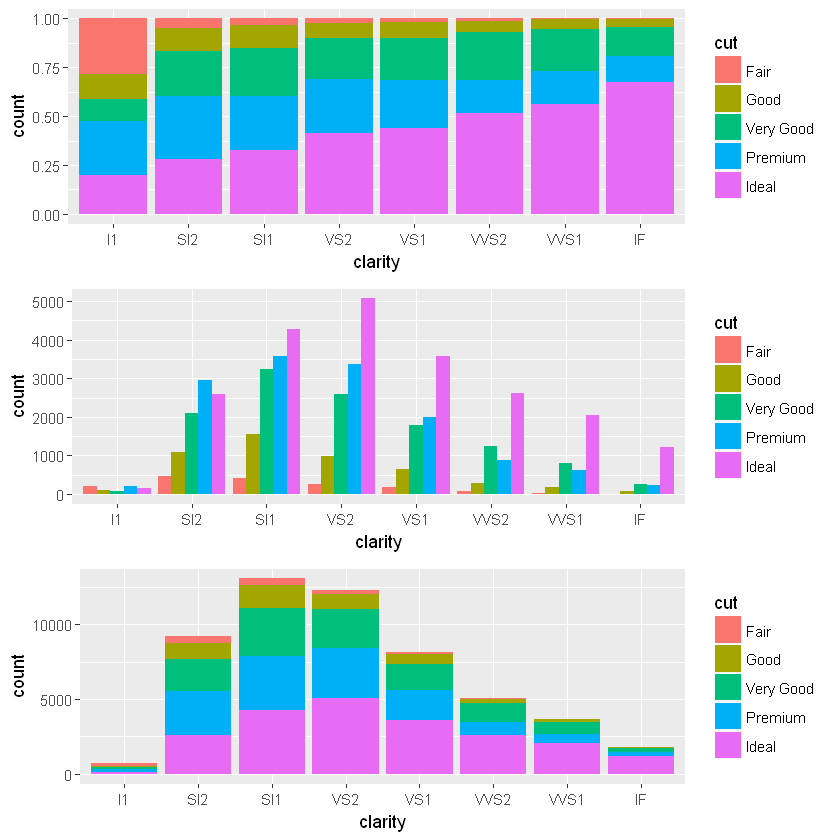

In [79]:
p = ggplot(data = diamonds) + aes(x = clarity,
                                 fill = cut)

#위치 조정 함수 position 
plot1 = p + geom_bar(position = "fill")  # 전체를 가득 채움
plot2 = p + geom_bar(position = "dodge") # 가장자리에 붙여서 나옴
plot3 = p + geom_bar(position = "stack") # 누적 막대 그래프
gridExtra::grid.arrange(plot1, plot2, plot3)
# 그래프 순서가 반대로 나오는데?
# factor 순서 때문인가

# Stats
### geom 들을 다른 통계값들로 연결해준다.
---

Warning message:
"Ignoring unknown aesthetics: ymax"Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."

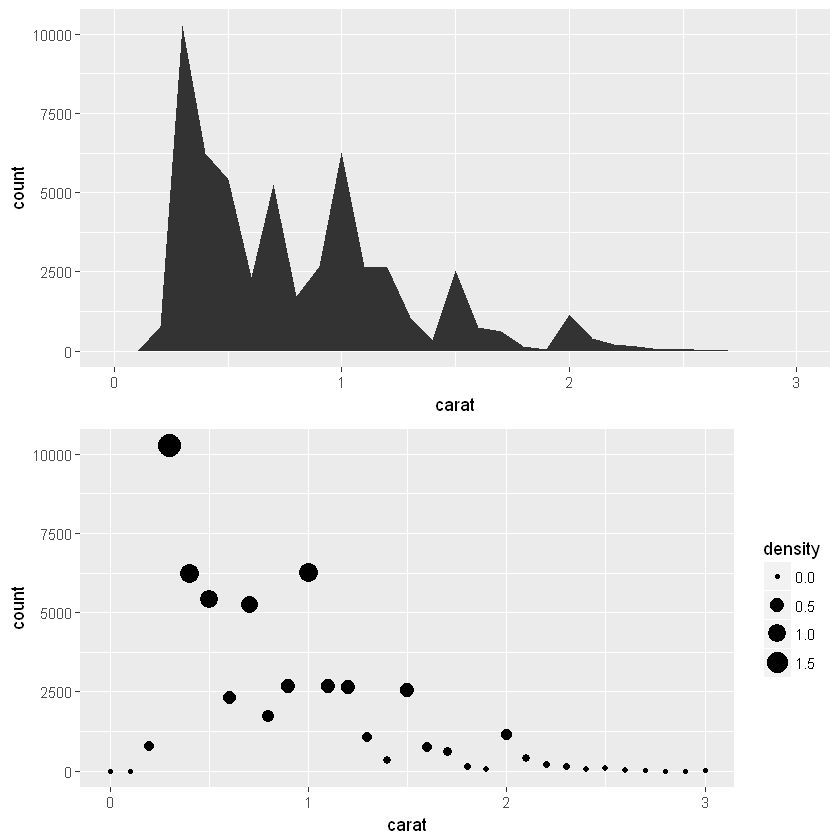

In [85]:
p = ggplot(diamonds,
          aes(carat)) + xlim(0,3)
plot1 = p + stat_bin(aes(ymax = ..count..),
                    binwidth = 0.1,
                    geom = "area")

plot2 = p + stat_bin(aes(size = ..density..),
                    binwidth = 0.1,
                    geom = "point",
                    position = "identity"))
gridExtra::grid.arrange(plot1, plot2)

Warning message:
"Removed 34912 rows containing non-finite values (stat_bin2d)."Warning message:
"Removed 7 rows containing missing values (geom_tile)."Warning message:
"Removed 34912 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 8 rows containing missing values (geom_hex)."

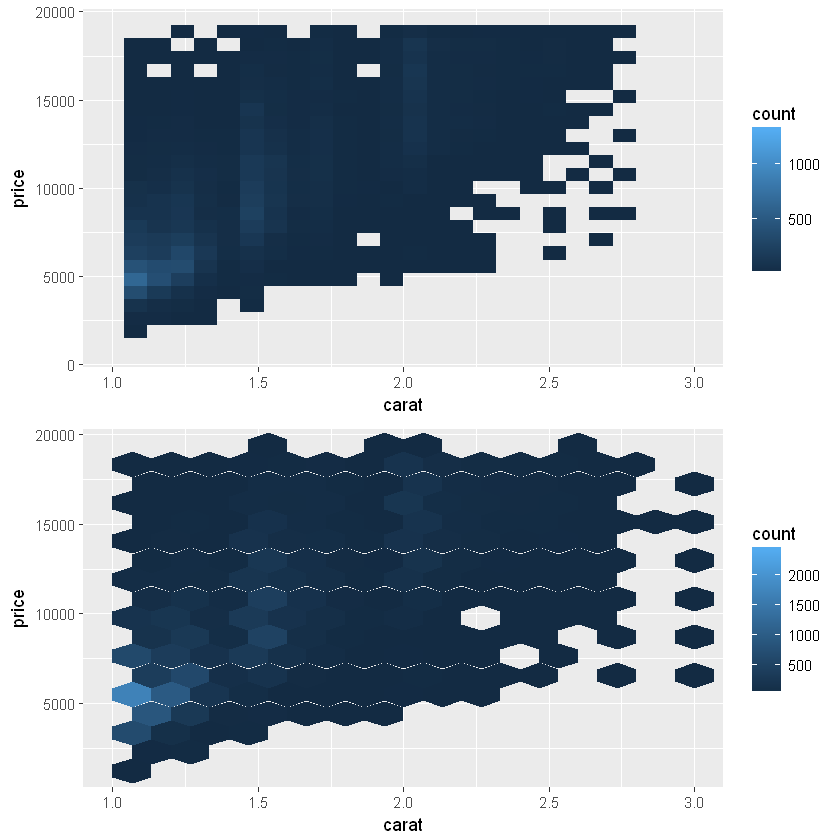

In [91]:
p = ggplot(diamonds,
          aes(carat,
             price)) + xlim(1,3)
plot1 = p + stat_bin2d(bins = 25)
plot2 = p + stat_binhex(bins = 15)
gridExtra::grid.arrange(plot1, plot2)

Warning message:
"Removed 34912 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 34912 rows containing missing values (geom_point)."Warning message:
"Removed 34912 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 34912 rows containing non-finite values (stat_density2d)."

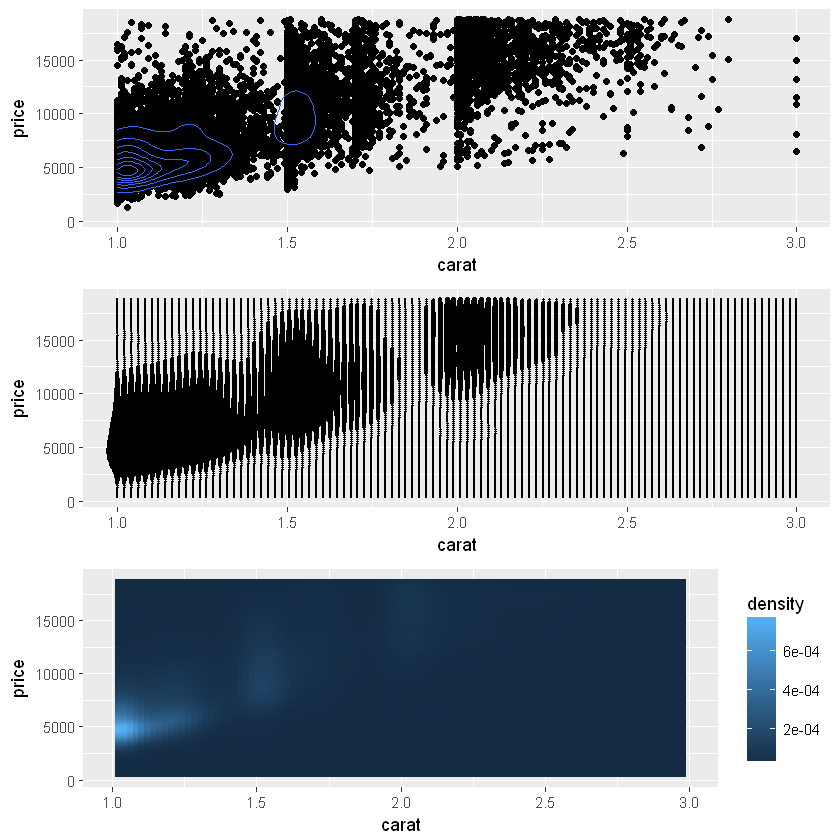

In [94]:
p = ggplot(diamonds,
          aes(carat, price)) + xlim(1,3)
plot1 = p + geom_point() + geom_density2d()
plot2 = p + stat_density2d(geom = "point",
                           aes(size = ..density..),
                           contour = F) +
             scale_size_area(0.2, 1.5)
plot3 = p + stat_density2d(geom = "tile",
                          aes(fill = ..density..),
                          contour = F)
grid.arrange(plot1, plot2, plot3)

# Annotating plots
---

In [96]:
presdts = presidential[-(1:3),]
presdts$start = as.Date(presdts$start)
head(presdts, 4)

name,start,end,party
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic
Reagan,1981-01-20,1989-01-20,Republican


In [97]:
head(economics, 4)

date,pce,pop,psavert,uempmed,unemploy,year
1967-07-01,507.4,198712,12.5,4.5,2944,1967
1967-08-01,510.5,198911,12.5,4.7,2945,1967
1967-09-01,516.3,199113,11.7,4.6,2958,1967
1967-10-01,512.9,199311,12.5,4.9,3143,1967


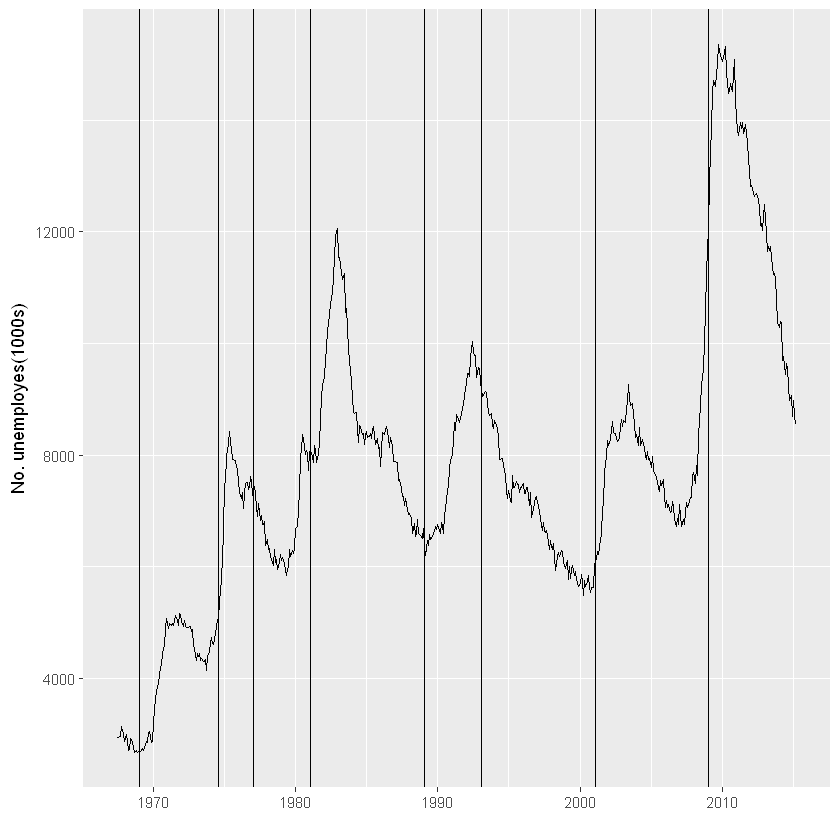

In [99]:
p = qplot(date, unemploy,
         data = economics,
         geom = "line",
         xlab = "",
         ylab = "No. unemployes(1000s)")
p + geom_vline(aes(xintercept = as.numeric(start)),
              data = presdts) + 
    scale_x_date()

Warning message:
"Ignoring unknown aesthetics: x, y"

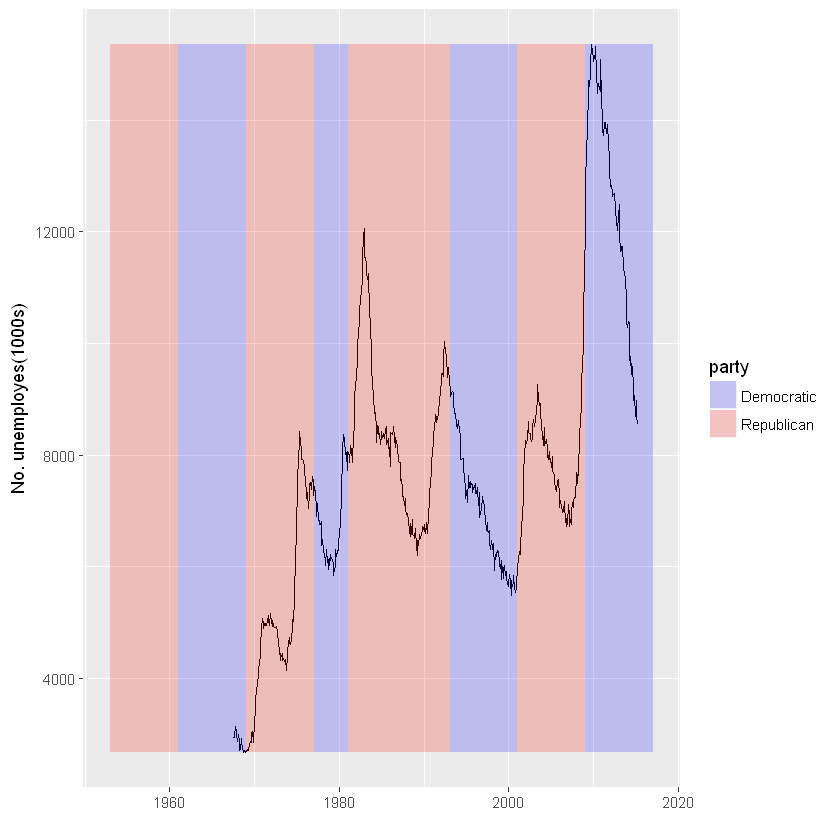

In [100]:
yrng = range(economics$unemploy)
xrng = range(economics$date)

library(scales) # use: alpha()
p + geom_rect(aes(NULL, NULL, xmin = start, xmax = end, fill = party), 
              ymin = yrng[1], ymax = yrng[2], data = presidential) +
    scale_fill_manual(values = alpha(c("blue", "red"), 0.2))

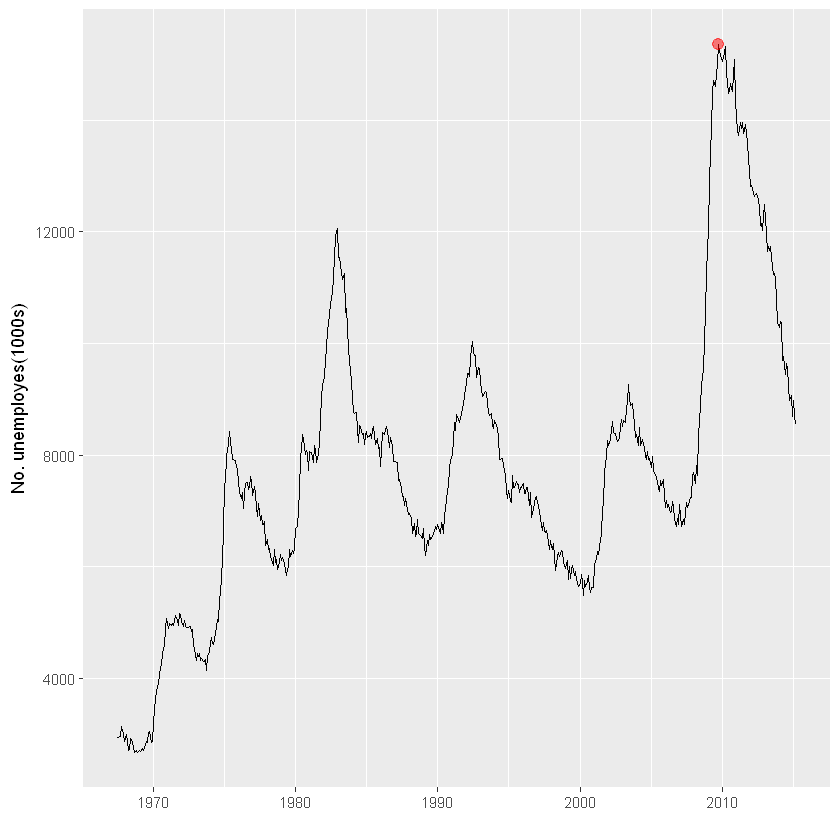

In [101]:
highest <- subset(economics, unemploy == max(unemploy))
p + geom_point(data = highest, size = 3, colour = alpha("red", 0.5))

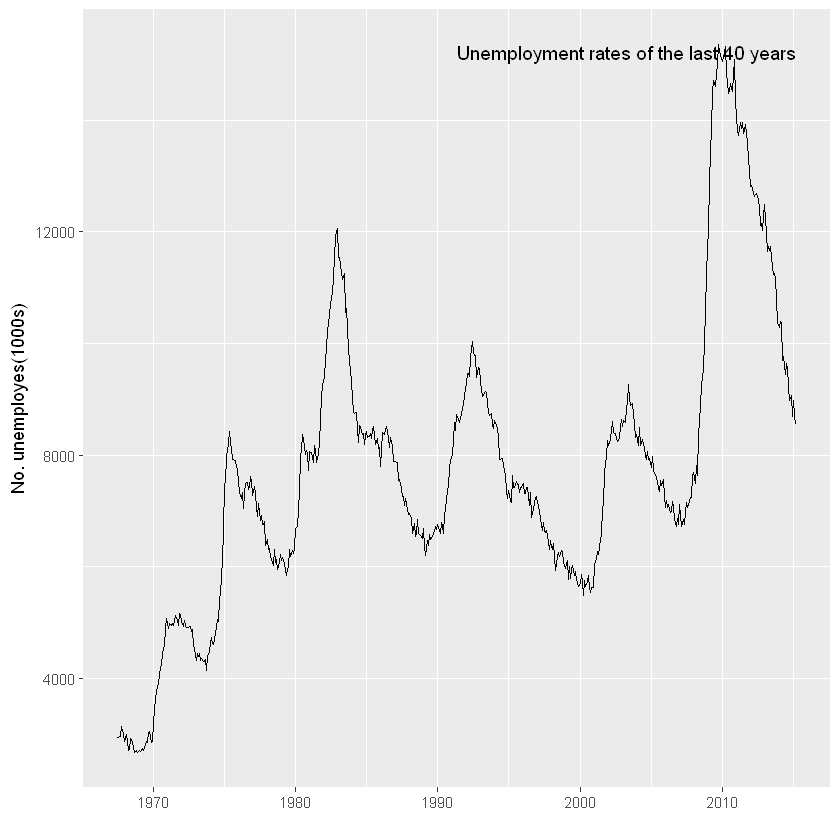

In [103]:
p + geom_text(aes(x, y, label = "Unemployment rates of the last 40 years"), 
              data = data.frame(x = xrng[2], y = yrng[2]), 
              hjust = 1, vjust = 1, size = 4)

# Transformations
---

Warning message in self$trans$x$transform(x):
"NaN이 생성되었습니다"Warning message in trans$transform(value):
"NaN이 생성되었습니다"

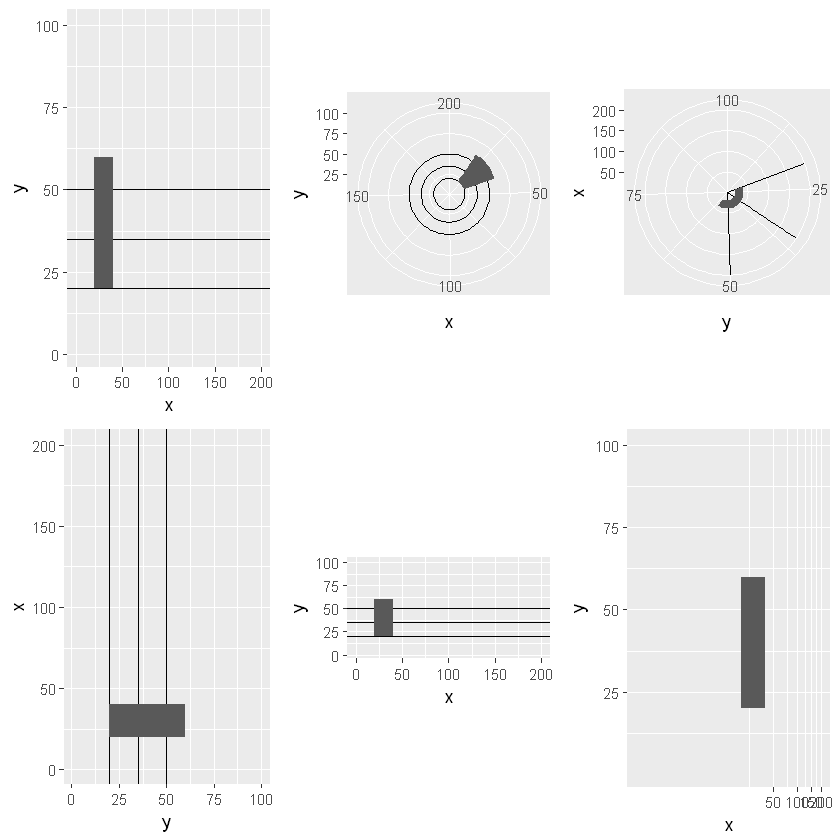

In [104]:
p <- ggplot(data=data.frame(x=c(1,200),y=c(1,100))) + aes(x,y)
plot1 <- p + geom_hline(yintercept=seq(20, 60, by=15)) +
             geom_rect(xmin=20, xmax=40, ymin=20, ymax=60)
             
plot2 <- plot1 + coord_polar()              # x position mapped to angle
plot3 <- plot1 + coord_polar(theta="y")     # y position mapped to angle
plot4 <- plot1 + coord_flip()               # flip coordinates
plot5 <- plot1 + coord_equal()  
plot6 <- plot1 + coord_trans(x = "log10")
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, nrow=2, ncol=3)

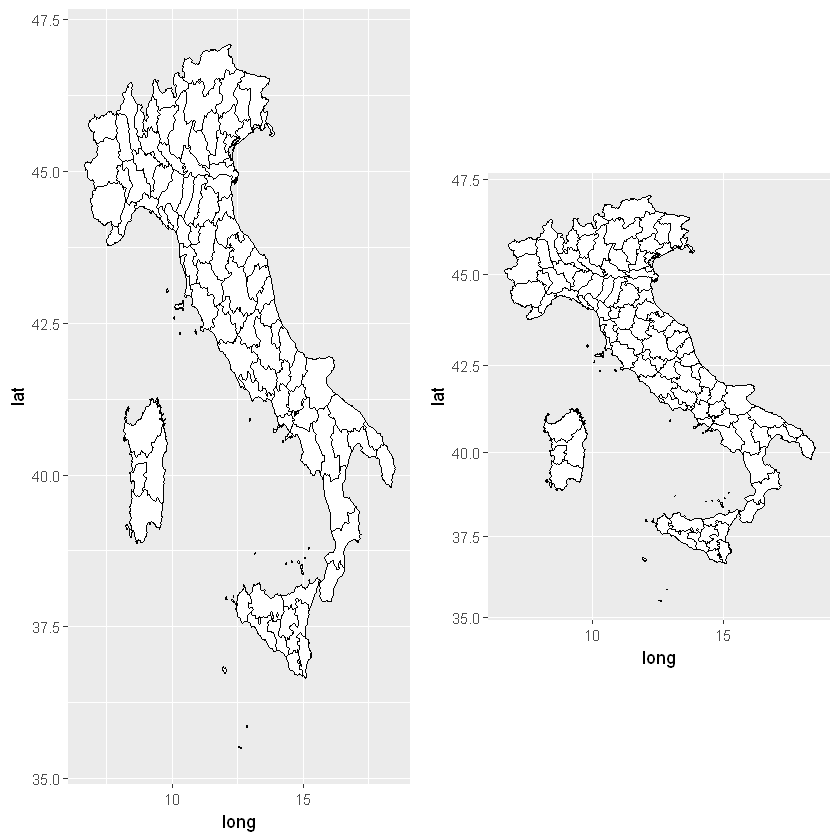

In [105]:
library("maps")

m <- map_data("italy")
p <- ggplot(m, aes(x=long, y=lat, group=group)) +
            geom_polygon(fill="white", colour="black")
plot1 <- p                # Use cartesian coordinates
plot2 <- p + coord_map()  # With default mercator projection
grid.arrange(plot1, plot2, ncol=2)

# Some more complex egs
---

In [108]:
library(ggmap)
head(crime)

,time,date,hour,premise,offense,beat,block,street,type,suffix,number,month,day,location,address,lon,lat
82729,2010-01-01 15:00:00,1/1/2010,0,18A,murder,15E30,9600-9699,marlive,ln,-,1,january,friday,apartment parking lot,9650 marlive ln,-95.43739,29.67790
82730,2010-01-01 15:00:00,1/1/2010,0,13R,robbery,13D10,4700-4799,telephone,rd,-,1,january,friday,road / street / sidewalk,4750 telephone rd,-95.29888,29.69171
82731,2010-01-01 15:00:00,1/1/2010,0,20R,aggravated assault,16E20,5000-5099,wickview,ln,-,1,january,friday,residence / house,5050 wickview ln,-95.45586,29.59922
82732,2010-01-01 15:00:00,1/1/2010,0,20R,aggravated assault,2A30,1000-1099,ashland,st,-,1,january,friday,residence / house,1050 ashland st,-95.40334,29.79024
82733,2010-01-01 15:00:00,1/1/2010,0,20A,aggravated assault,14D20,8300-8399,canyon,,-,1,january,friday,apartment,8350 canyon,-95.37791,29.67063
82734,2010-01-01 15:00:00,1/1/2010,0,20R,burglary,18F60,9300-9399,rowan,ln,-,1,january,friday,residence / house,9350 rowan ln,-95.54830,29.70223


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=houston&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=houston&sensor=false
Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"Removed 11 rows containing missing values (geom_point)."Warning message:
"Removed 11 rows containing non-finite values (stat_bin2d)."Warning message:
"Removed 11 rows containing non-finite values (stat_density2d)."

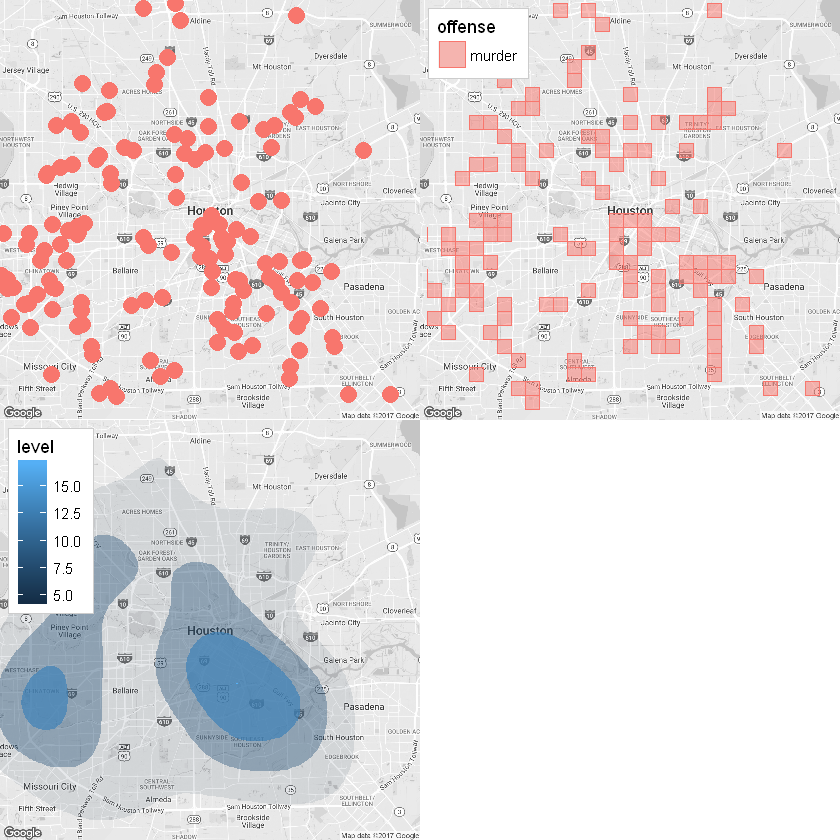

In [112]:
murders <- crime[crime$offense == "murder",]

# get map of Houston (this is also a ggplot object)
houstonMap <- qmap("houston", zoom = 11, color = "bw", legend = "topleft")

plot1 <- houstonMap +
          geom_point(aes(x = lon, y = lat, colour = "red", size = 2), data = murders) +
          theme(legend.position="none")

plot2 <- houstonMap +
          stat_bin2d(aes(x = lon, y = lat, colour = offense, fill = offense),
                     size = .5, bins = 30, alpha = 1/2, data = murders)

plot3 <- houstonMap +
          stat_density2d(aes(x = lon, y = lat, fill = ..level.., alpha = ..level..),
                         size = 2, bins = 4, data = murders, geom = "polygon") +
          guides(alpha=FALSE) # remove alpha legend
grid.arrange(plot1, plot2, plot3, ncol = 2)

In [116]:
#This next eg is based on Robin Lovelace and James Cheshire’s tutorial (the Rpubs page is here and also here).
# library(rgdal)
# sport <- readOGR(dsn = "files", "london_sport") # open files/london_sport

# sport.f <- fortify(sport, region = "ons_label") # format shapefile to plot
# head(sport.f)
# # add back attribute information associated with sport object (merge is a data join)
# sport.f <- merge(sport.f, sport@data, by.x = "id", by.y = "ons_label")
# head(sport.f)

sport <- SpatialPolygonsDataFrame(Sr = spTransform(sport, 
                                                   CRSobj = CRS("+init=epsg:4326")),
                                  data = sport@data)
sport.f  <- fortify(sport)    # format shapefile to be ploted
sport$id <- row.names(sport)  # provide same column names for join
sport.f  <- join(sport.f, sport@data)
head(sport.f)

p <- ggplot(sport.f, aes(long, lat, group = group, fill = Partic_Per)) +
      geom_polygon() + 
      coord_equal() + 
      labs(x = "Easting (m)", y = "Northing (m)", fill = "% Sport Partic.") + 
      ggtitle("London Sports Participation")
p + scale_fill_gradient(low = "white", high = "black") # black&white version

ERROR: Error in bbox(sport): 객체 'sport'를 찾을 수 없습니다


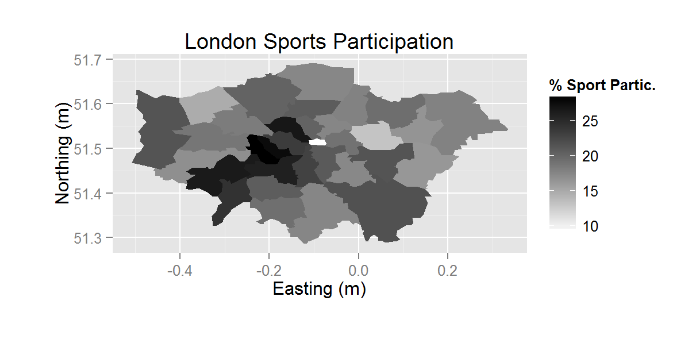

In [132]:
display_png(file="image/result1.PNG") 

In [ ]:
p <- ggplot() + 
       geom_polygon(data = sport.f, aes(x = long, y = lat, group = group)) +
       coord_map() # this line of code ensures the plot is to scale
plot1 <- p
plot2 <- p + geom_point(aes(x = coordinates(sport)[, 1], y = coordinates(sport)[,2]))
plot3 <- plot2 + 
  geom_path(data = sport.f, aes(x = long, y = lat, group = group), color = "white") + 
  theme_classic()  # this line removes the distracting grey background

new_theme <- theme(axis.line = element_blank(), axis.ticks = element_blank(), 
                   axis.title.x = element_blank(), axis.title.y = element_blank(),
                   axis.text.y = element_blank(), axis.text.x = element_blank(),
                   axis.text.y = element_blank(), axis.text.y = element_blank(), 
                   panel.background = element_rect(fill = "lightgreen"))
plot4 <- p + new_theme
grid.arrange(plot1, plot2, plot3, plot4, nrow=2, ncol=2)

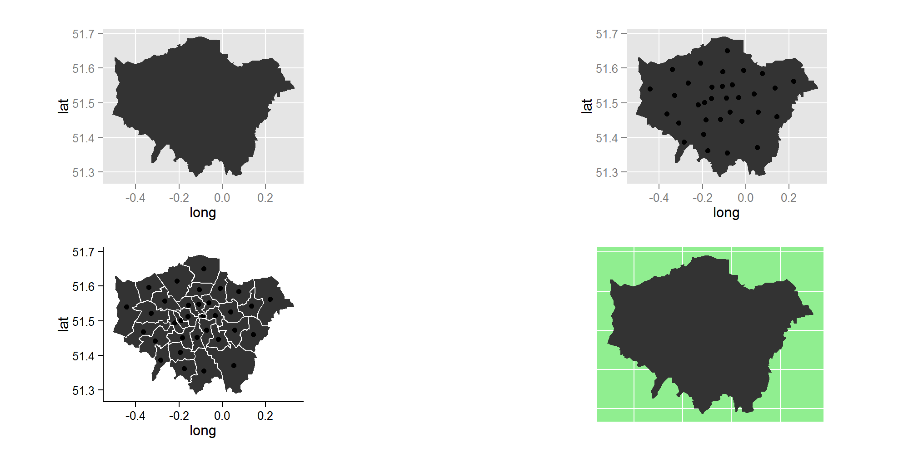

In [133]:
display_png(file="image/result2.PNG") 

In [ ]:
library(ggmap) 
b <- bbox(sport)
p <- ggmap(get_map(location = b))
plot1 <- p
plot2 <- p + 
  geom_polygon(data=sport.f, aes(x=long, y=lat, group=group, fill=Partic_Per), alpha=0.5) + 
  scale_fill_continuous(low = "green", high = "red") 

# using a new map source
p <- ggmap(get_map(location = b, source = "stamen", maptype = "toner", crop = T))
plot3 <- p + geom_polygon(data = sport.f, 
                     aes(x=long, y=lat, group=group, fill=Partic_Per), alpha = 0.5)
grid.arrange(plot1, plot2, plot3, nrow=2, ncol=2)

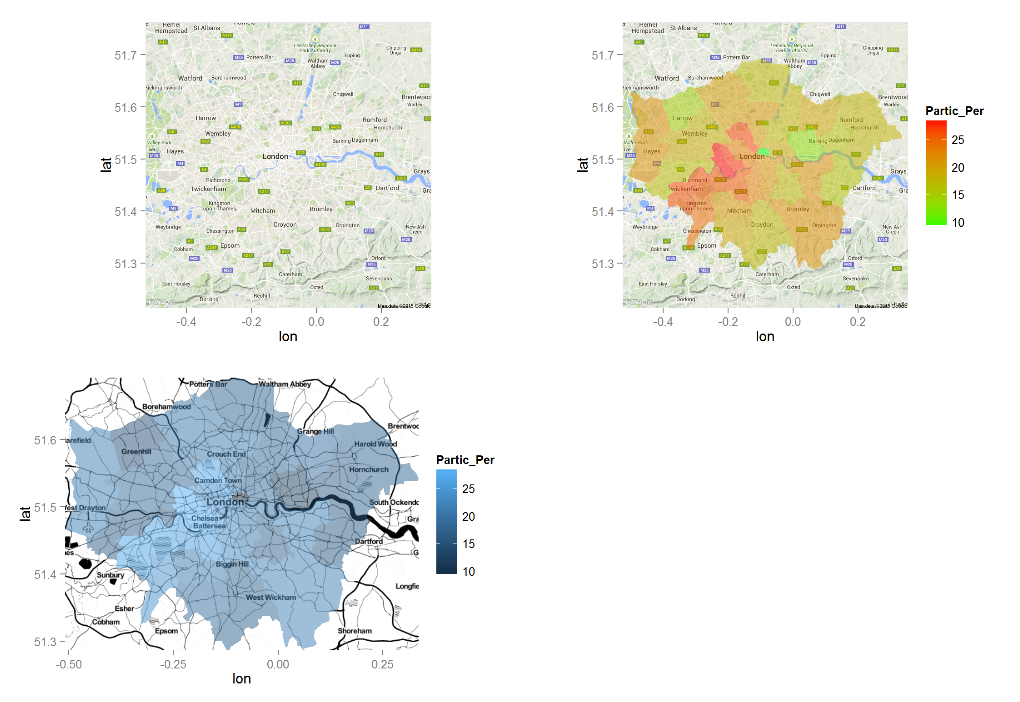

In [135]:
display_png(file="image/result3.PNG") 